In [1]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estatísticos
from scipy.stats import ttest_ind

from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')
# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doMigracao(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doEscolaridade(pfEnade)
pfEnade = doCategoricos(pfEnade)

X, y, X_train, X_test, y_train, y_test = doSplit(pfEnade)

In [3]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
model.score(X_test, y_test)

0.6432597549001782

In [5]:
y_predicted = model.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[8842, 4883],
       [4927, 8847]], dtype=int64)

Text(69.0, 0.5, 'Truth')

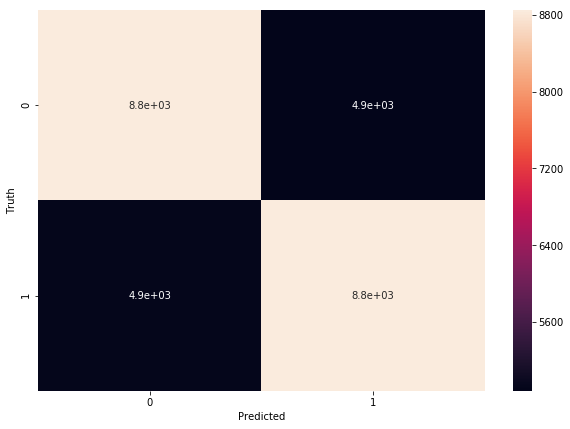

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')